In [1]:
import numpy as np
import mogp_emulator
import pickle
import matplotlib.pyplot as plt
#from scipy.stats import norm, randint 
from scipy.linalg import norm
import matplotlib
import time
font = { 'family' : 'sans-serif',
                'weight' : 'normal',
                'size'   : 12}
matplotlib.rc('font', **font)
import pandas as pd
# from helper_functions import (get_l_norm, get_l_norm_all_values,
#get_norm_val_for_norm, get_error, get_norm_error, get_norm_for_plot, get_param_err_plot, 
# get_norm_plot, print_results, get_validation_norms, get_full_intersec_res)
from analysis_functions import (signif, get_arrays_for_gpe_verif, get_gpe_verif, get_subset_inds,intersection, 
norms_test, get_best_params, get_append_arr, generate_results, get_run_name, append_results, power_selector,find_if_params_equal)
from visualisation_functions import (get_l_norm, get_l_norm_all_values,
get_norm_val_for_norm, get_error, get_norm_error, get_norm_for_plot, get_param_err_plot, 
get_norm_plot, print_results, get_validation_norms, get_full_intersec_res)

In [2]:
offset_cont = "_asymr"
# offset_cont = "_asyml"
data_dir_cont = 'hm_results'
gpow_cont = "" # empty string for det. power, otherwise use "_gpow_avex" or "_gpow_avx" 
num_hm_cont = '15000000'
gpe_control = ''
runs = ['', '_run2', '_run3','_run4','_run5',]
# snr_pens = [3001, 2001, 1001, 0.5001, 0.25001]
snr_pens = [3001]

In [3]:
for sp in snr_pens:
    powers_cont, snrpen_cont = power_selector(sp, offset_cont)
    power_names_cont = [str(int(pow)) for pow in powers_cont]
    append_results(data_dir_cont, power_names_cont[0], power_names_cont[1], power_names_cont[2], power_names_cont[3],
                   power_names_cont[4], snrpen_cont,num_hm_cont,offset_cont, runs,
                   'analysis_results/detpowres_test.csv', gpe_control,gpow_cont, powers_cont, power_names_cont)

intersec array length = 249
[3001, 0.2, 1.2, 4.5, 14.8, '15000000', 249, 12, 'R', 1, 1, 0.008089, 0.004179, 0.002982]
[3001, 0.2, 1.2, 4.51, 14.8, '15000000', 249, 3, 'R', 1, 1, 0.008089, 0.004179, 0.002982]


/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)
/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)


intersec array length = 243
[3001, 0.2, 1.2, 4.5, 14.8, '15000000', 243, 12, 'R', 2, 1, 0.008089, 0.004179, 0.002982]
[3001, 0.2, 1.2, 4.51, 14.8, '15000000', 243, 3, 'R', 2, 1, 0.008089, 0.004179, 0.002982]


/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)
/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)


intersec array length = 260
[3001, 0.2, 1.2, 4.5, 14.8, '15000000', 260, 12, 'R', 3, 1, 0.008089, 0.004179, 0.002982]
[3001, 0.2, 1.2, 4.51, 14.8, '15000000', 260, 3, 'R', 3, 1, 0.008089, 0.004179, 0.002982]


/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)
/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)


intersec array length = 255
[3001, 0.2, 1.2, 4.5, 14.8, '15000000', 255, 12, 'R', 4, 1, 0.008089, 0.004179, 0.002982]
[3001, 0.2, 1.2, 4.51, 14.8, '15000000', 255, 3, 'R', 4, 1, 0.008089, 0.004179, 0.002982]


/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)
/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)


intersec array length = 250
[3001, 0.2, 1.2, 4.5, 14.8, '15000000', 250, 12, 'R', 5, 1, 0.008089, 0.004179, 0.002982]
[3001, 0.2, 1.2, 4.51, 14.8, '15000000', 250, 3, 'R', 5, 1, 0.008089, 0.004179, 0.002982]


/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)
/Users/joshnevin/gpe_parameter_estimation/analysis_functions.py:314: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_df = main_df.append(params_df)


**Plot histograms to analyse the distribution of physical layer parameters**

In [4]:
power_names_cont = [str(int(pow)) for pow in powers_cont]
intersec_res = get_full_intersec_res(data_dir_cont, power_names_cont[0], power_names_cont[1], power_names_cont[2],
                                     power_names_cont[3], power_names_cont[4], num_hm_cont, runs[0], 
                offset_cont, gpow_cont, gpe_control, powers_cont, power_names_cont)

intersec array length = 249


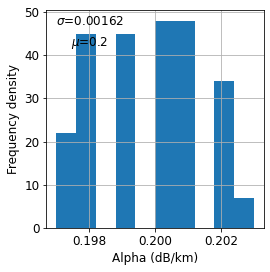

In [5]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,1])
plt.xlabel("Alpha (dB/km)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,1]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,1]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/alpha_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

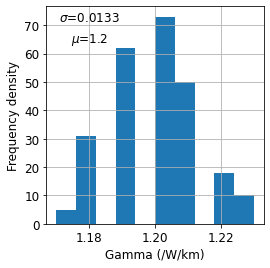

In [6]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,3])
plt.xlabel("Gamma (/W/km)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,3]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,3]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/gamma_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

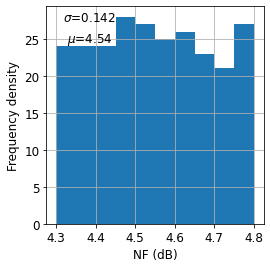

In [7]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,4])
plt.xlabel("NF (dB)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,4]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,4]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/nf_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

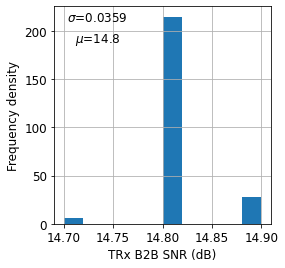

In [8]:
f, ax = plt.subplots()
plt.hist(intersec_res[:,5])
plt.xlabel("TRx B2B SNR (dB)")
plt.ylabel("Frequency density")
plt.text(0.2, 0.95, '$\sigma$='+str(signif(np.std(intersec_res[:,5]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.2, 0.85, '$\mu$='+str(signif(np.mean(intersec_res[:,5]),3)), horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
#plt.xlim([])
#plt.ylim([0,0.003])
plt.grid()
#plt.legend(ncol=2, prop={'size':10}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.savefig('figures/b2b_hist_'+str(snrpen_cont)+str(offset_cont)+str(gpow_cont)+'.pdf', dpi=200,bbox_inches='tight')
plt.show()

Get validation results for a given launch power

In [9]:
gausspow_var_df = pd.read_csv('analysis_results/gausspowres_variance.csv')
gausspow_sam_df = pd.read_csv('analysis_results/gausspowres_wnorms.csv')
sams = np.array([1, 3, 5, 10, 30, 50, 100])

In [10]:
gpe_dir = "saved_gpes"
# offset = "_asymr_hipres"
val_pows_r = ['-103', '-85', '-61', '-45', '-34', '-11', '10', '18', '27', '40', '49']
val_pows_l = ['-112', '-93', '-68', '-51', '-39', '-11', '9', '17', '28', '41', '50']
l1_norms_r = get_validation_norms(gpe_dir, val_pows_r, "_asymr_hipres", 1, gpe_dir)
l2_norms_r = get_validation_norms(gpe_dir, val_pows_r, "_asymr_hipres", 2, gpe_dir)
l1_norms_l = get_validation_norms(gpe_dir, val_pows_l, "_asyml_hipres", 1, gpe_dir)
l2_norms_l = get_validation_norms(gpe_dir, val_pows_l, "_asyml_hipres", 2, gpe_dir)

In [11]:
val_pows_r_ar = [float(pow)/10 for pow in val_pows_r]
val_pows_l_ar = [float(pow)/10 for pow in val_pows_l]

In [12]:
def get_validation_norms_test(gpe_direc, val_powers, offset_name, norm_type):
    """
    get validation results for each launch power
    """
    norms = np.zeros([len(val_powers),1])
    for i in range(len(val_powers)):    
        #val_pts = pickle.load(open("saved_models/"+gpe_dir+"/validation_points_ssfm"+val_pow+offset+".pkl", 'rb'))
        pred = pickle.load(open(gpe_dir+"/predictions_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        val_out = pickle.load(open(gpe_dir+"/validation_output_ssfm"+val_powers[i]+offset_name+".pkl", 'rb'))
        norms[i] = norm((pred.mean - val_out), norm_type)
    return norms, pred, val_out

In [13]:
_, pred_test, val_out_test = get_validation_norms_test(data_dir_cont, val_pows_r, "_asymr_hipres", 1)

In [14]:
(abs(val_out_test[9] - pred_test[0][9])/val_out_test[9])*100

0.02634396327954472

In [15]:
(abs(val_out_test[3] - pred_test[0][3])/val_out_test[3])*100

0.0010437998872354596

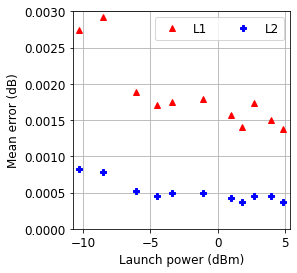

In [16]:
f, ax = plt.subplots()
plt.plot(val_pows_r_ar,l1_norms_r/20, 'r^', label='L1')
plt.plot(val_pows_r_ar,l2_norms_r/20, 'bP', label='L2')
# plt.plot(val_pows_l_ar,l1_norms_l, 'b--', label='L1 L')
# plt.plot(val_pows_l_ar,l2_norms_l, 'b:', label='L2 L')
plt.ylabel("Mean error (dB)")
plt.xlabel("Launch power (dBm)")
plt.xlim([val_pows_r_ar[0]-0.5, val_pows_r_ar[-1]+0.5])
plt.ylim([0,0.003])
plt.grid()
plt.legend(ncol=2, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('figures/val_norms_vs_launch_power_right.png', dpi=500,bbox_inches='tight')
plt.show()

Plot dataset used:

In [17]:
ground_truth_sim = pickle.load(open("gt_data/ssfm_full_power_ground_truth_sim_hipres.pkl", 'rb')).reshape(211,)
power_exp = np.arange(-15., 6.1, 0.1)
x_lin = power_exp[139]*np.ones([7,])
y_lin = np.arange(9,16,1)

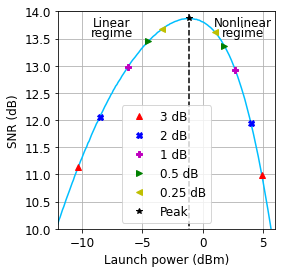

In [18]:
f, ax = plt.subplots()
plt.plot(power_exp, ground_truth_sim, 'deepskyblue')
plt.xlabel("Launch power (dBm)")
plt.ylabel("SNR (dB)")
plt.grid()
plt.text(0.25, 0.95, 'Linear', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.25, 0.90, 'regime', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.85, 0.95, 'Nonlinear', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.text(0.85, 0.90, 'regime', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize = 12)
# plt.text(0.2, 0.95, 'towards linear regime', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, fontsize = 12)
plt.plot(x_lin, y_lin, 'k--')
# plt.plot(power_exp[38], ground_truth_sim[38], 'b^', label='3 dB L') # -11.2 (3db) L
plt.plot(power_exp[47], ground_truth_sim[47], 'r^', label='3 dB') # -10.3 (3db) R
# plt.plot(power_exp[56], ground_truth_sim[56], 'b^', label='2 dB L') # -9.4 (2db) L
plt.plot(power_exp[65], ground_truth_sim[65], 'bX', label='2 dB') # -8.5 (2db) R
# plt.plot(power_exp[80], ground_truth_sim[80], 'b^', label='1 dB L') # -7.0 (1db) L
plt.plot(power_exp[88], ground_truth_sim[88], 'mP', label='1 dB') # -6.2 (1db) R
plt.plot(power_exp[105], ground_truth_sim[105], 'g>', label='0.5 dB') # -4.5 (0.5db) R
plt.plot(power_exp[116], ground_truth_sim[116],'y<', label='0.25 dB') # -3.4 (0.25db) R
plt.plot(power_exp[139], ground_truth_sim[139], 'k*', label='Peak') # -1.1 (all) R
plt.plot(power_exp[160], ground_truth_sim[160], 'y<') # 1.0 (0.25db) R
plt.plot(power_exp[168], ground_truth_sim[168], 'g>') # 1.8 (0.5db) R
plt.plot(power_exp[177], ground_truth_sim[177], 'mP') # 2.7 (1db)  R
plt.plot(power_exp[190], ground_truth_sim[190], 'bX') # 4.0 (2db)  R 
plt.plot(power_exp[199], ground_truth_sim[199], 'r^') # 4.9 (3db)  R 
# plt.plot(power_exp[178], ground_truth_sim[178], 'mP') # 2.8 (1db)  L
# plt.plot(power_exp[191], ground_truth_sim[191], 'bX') # 4.1 (2db)  L 
# plt.plot(power_exp[200], ground_truth_sim[200], 'r^') # 5.0 (3db)  L 
plt.xlim([-12, 6])
plt.ylim([10, 14])
plt.legend(ncol=1, prop={'size':12}, loc=0)
f.patch.set_facecolor('w')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
#plt.savefig('figures/ground_truth_data_det_power_right.png', dpi=500,bbox_inches='tight')
plt.show()